<a href="https://colab.research.google.com/github/imgnourt/Cost-Prediction-on-Customer-Acquisition/blob/main/Customore_Testcase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Prepare** 

## **About Data**
* Customer_unique_id: the ID to identify an unique customer. Each unique customer will be given one ID only
* Order_id: the ID to identify different orders. Each order successfully created will have one unique ID
* Item_quantity: number of items in each order
* Created_day: the day when the order was generated
* Onsite_original_price: the original price from manufacture without any promotion
* Selling_price: the price that we show to customer after a certain discount from the original price
* shipping_fee: the fee that customer have to pay for shipping service
* voucher_platform: the amount of an addition promotion coming from a voucher/ coupon sponsored by the e-commerce platform (Lazada, Shopee, Tiki, etc.)
* voucher_seller: the amount of an additional promotion coming from a voucher / coupon sponsored by the brand / seller
* payment_method: the payment method chosen by the customer for each order
* order_status: the most updated status of each order after being created. 
COMPLETED = successfully delivered to customer without cancellation. CANCELLED = failed to delivered or cancelled by customer before shipping

## The idea:
* Visualization quantity per day, total selling price of each, plattform,
* Clustering by K-Mean
## Solution
* Walmart, Popupar product, boosting low
* Media, new platform: data from tiktok
## The idea
What is the average transaction value ?
Most bought customer categories
Trend of sales over the day,week,month
Number of products boight by each customer
Delivery days ..



In [47]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import calendar
import math
from scipy.stats import skew,kurtosis

# from scipy.stats import chi2_contingency
# from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error
%matplotlib inline
sns.set_theme(color_codes=True, style='darkgrid', 
              palette='deep', font='sans-serif')

import warnings
warnings.filterwarnings('ignore')

## Reading the data

In [27]:
#order data
o_url = 'https://raw.githubusercontent.com/imgnourt/Customore_Testcase/main/CSV_File/Sample_Customore_Order_raw.csv'
df = pd.read_csv(o_url)
#traffic data
t_url = 'https://raw.githubusercontent.com/imgnourt/Customore_Testcase/main/CSV_File/Sample_Customore_Traffic%20raw.csv'
t_df = pd.read_csv(t_url)

In [28]:
df.head()

,customer_unique_id,order_id,item_quantity,created_day,onsite_original_price,selling_price,shipping_fee,voucher_platform,voucher_seller,payment_method,order_status
0,1,A000000001,1,7/1/2019,338000,259000,3000,0,0,Airpay GIRO,CANCELLED
1,2,A000000002,1,7/1/2019,175000,139000,0,0,0,Cash on Delivery,COMPLETED
2,3,A000000003,1,7/1/2019,520000,359000,14927,0,0,Cybersource,COMPLETED
3,4,A000000004,1,7/1/2019,238000,185000,29645,0,0,Cash on Delivery,COMPLETED
4,5,A000000005,1,7/1/2019,159000,129000,14927,0,0,Cash on Delivery,CANCELLED


In [29]:
t_df.head()

,Source / Medium,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue
0,google / cpc,407950,344502,723208,62.19%,3.56,176.03,0.91%,6566,6.656088e+09
1,youtube / social,77785,55537,163447,78.81%,2.24,89.94,0.59%,957,8.429079e+08
2,(direct) / (none),64653,60181,108534,55.33%,4.12,200.43,0.97%,1048,1.040851e+09
3,facebook / social,48721,32781,176662,84.40%,1.86,73.21,0.28%,500,5.344857e+08
4,youtube.com / referral,27718,17774,42464,63.92%,2.98,148.44,1.20%,508,4.025419e+08


# Exploratory Data Analysis

In [18]:
df.shape

(61728, 11)

In [20]:
df.describe()

,customer_unique_id,item_quantity,onsite_original_price,selling_price,shipping_fee,voucher_platform,voucher_seller
count,61728.000000,61728.000000,6.172800e+04,6.172800e+04,61728.000000,61728.0,61728.0
mean,14323.092260,1.111748,2.347072e+05,1.514818e+05,11191.105689,0.0,0.0
std,8050.804821,1.487318,1.574884e+05,1.178384e+05,16157.498442,0.0,0.0
min,1.000000,1.000000,1.000000e+03,0.000000e+00,0.000000,0.0,0.0
25%,7954.000000,1.000000,1.500000e+05,8.900000e+04,0.000000,0.0,0.0
50%,13852.500000,1.000000,1.950000e+05,1.250000e+05,3000.000000,0.0,0.0
75%,20361.250000,1.000000,2.580000e+05,1.790000e+05,16000.000000,0.0,0.0
max,30513.000000,198.000000,1.750000e+06,1.579000e+06,384500.000000,0.0,0.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61728 entries, 0 to 61727
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   customer_unique_id     61728 non-null  int64 
 1   order_id               61728 non-null  object
 2   item_quantity          61728 non-null  int64 
 3   created_day            61728 non-null  object
 4   onsite_original_price  61728 non-null  int64 
 5   selling_price          61728 non-null  int64 
 6   shipping_fee           61728 non-null  int64 
 7   voucher_platform       61728 non-null  int64 
 8   voucher_seller         61728 non-null  int64 
 9   payment_method         61728 non-null  object
 10  order_status           61728 non-null  object
dtypes: int64(7), object(4)
memory usage: 5.2+ MB


In [34]:
#checking null values
df.isnull().sum()

customer_unique_id       0
order_id                 0
item_quantity            0
created_day              0
onsite_original_price    0
selling_price            0
shipping_fee             0
voucher_platform         0
voucher_seller           0
payment_method           0
order_status             0
dtype: int64

In [41]:
# checking duplicated values
print("The number os duplicate values is "+str(df.duplicated().sum()))

The number os duplicate values is 1897


In [42]:
#drop null and duplicated values
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [44]:
df.shape

(59831, 11)

In [51]:
#Check the payment method
method=df.groupby('payment_method')['order_id'].nunique().sort_values(ascending=False)
method

payment_method
Cash on Delivery                    33075
Airpay GIRO                          1789
Cybersource                           978
Airpay Wallet V2                      893
VN Airpay Ibanking (Vietcombank)      196
Cybersource (new)                     177
Shopee Wallet                         175
VN Airpay Ibanking (Techcombank)      101
VN Airpay Ibanking (BIDV)              84
VN Airpay Ibanking (VPbank)            72
VN Airpay Ibanking (Vietinbank)        64
VN Airpay Ibanking (Agribank)          62
VN Airpay Ibanking (ACB)               41
VN Airpay Ibanking (Sacombank)         24
VN Airpay Ibanking (TPbank)            20
VN Airpay Ibanking (DongAbank)         16
VN Airpay Ibanking (MSbank)            11
VN Airpay Ibanking (MB)                11
VN Airpay Ibanking (NCB)                7
VN Airpay Ibanking (Oceanbank)          6
VN Airpay Ibanking (SHB)                5
VN Airpay Ibanking (Eximbank)           5
VN Airpay Ibanking (HDbank)             5
VN Airpay Ibanking 

Most of order is COD

In [59]:
df['order_status'].value_counts()

COMPLETED    48134
CANCELLED    11697
Name: order_status, dtype: int64

([<matplotlib.patches.Wedge at 0x7f6d3d400cd0>,
 [Text(1.8387996815167567, 1.296655594695012, 'CANCELLED'),
  Text(-1.838799742217584, -1.2966555086145848, 'COMPLETED')],
 [Text(1.0215553786204203, 0.7203642192750066, '19.6%'),
  Text(-1.021555412343102, -0.720364171452547, '80.4%')])

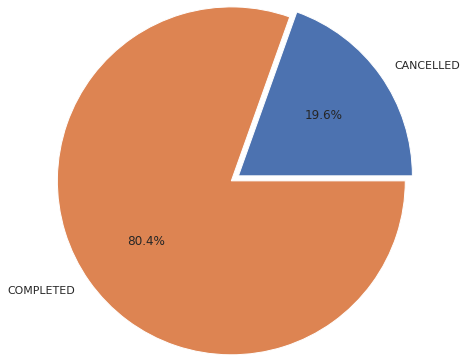

In [66]:
#Order status
r = df.groupby('order_status')['order_status'].count()
plt.pie(r, explode=[0.05, 0.05], labels=['CANCELLED', 'COMPLETED'], 
        radius=2.0, autopct='%1.1f%%')

Cancelled rate reach 19,6%, that little high

In [67]:
method=df.groupby('payment_method')['order_id'].nunique().sort_values(ascending=False)
method

payment_method
Cash on Delivery                    33075
Airpay GIRO                          1789
Cybersource                           978
Airpay Wallet V2                      893
VN Airpay Ibanking (Vietcombank)      196
Cybersource (new)                     177
Shopee Wallet                         175
VN Airpay Ibanking (Techcombank)      101
VN Airpay Ibanking (BIDV)              84
VN Airpay Ibanking (VPbank)            72
VN Airpay Ibanking (Vietinbank)        64
VN Airpay Ibanking (Agribank)          62
VN Airpay Ibanking (ACB)               41
VN Airpay Ibanking (Sacombank)         24
VN Airpay Ibanking (TPbank)            20
VN Airpay Ibanking (DongAbank)         16
VN Airpay Ibanking (MSbank)            11
VN Airpay Ibanking (MB)                11
VN Airpay Ibanking (NCB)                7
VN Airpay Ibanking (Oceanbank)          6
VN Airpay Ibanking (SHB)                5
VN Airpay Ibanking (Eximbank)           5
VN Airpay Ibanking (HDbank)             5
VN Airpay Ibanking 

In [71]:
top_order = df.groupby('order_id')['selling_price'].sum().sort_values(ascending=False).reset_index()
top_order.head(10)

,order_id,selling_price
0,A000005002,2758000
1,A000033367,2634000
2,A000032891,2597000
3,A000034874,2587000
4,A000001550,2586000
5,A000012356,2550000
6,A000004536,2478000
7,A000037287,2466000
8,A000037436,2308000
9,A000020207,2303000
